# CS 136 day14: Metropolis MCMC Demo

## Outline

* **Part 1: Implementing Metropolis Step-by-Step**


## Takeaways

* Metropolis is a way to sample from complex distributions
* Only need ability to evaluate PDF/PMF (up to constant)
* Only need ability to sample from your proposal $Q$ and a uniform over [0.0, 1.0]

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats

In [ ]:
np.set_printoptions(precision=3, suppress=False)

In [ ]:
pd.options.display.float_format = '{:,.3g}'.format  # show 3 digits of precision

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

In [ ]:
prng = np.random.RandomState(101)

# Part 1: Metropolis Demo for Discrete R.V.

Consider a simple discrete random variable, $Z$, that takes integer values in $\{1, 2, \ldots 9, 10\}$

We know its PMF up to a constant

\begin{align}
p( Z = 1 ) &= c \cdot 1
\\
p( Z = 2 ) &= c \cdot 1/2
\\
\ldots
\\
p( Z = k ) &= c \cdot 1/k
\\ \ldots
\\ 
p( Z = 10) &= c \cdot 1/10
\end{align}

where $c > 0$ is the normalization constant

## Step 1: Implement ability to sample from proposal distribution Q

We'll use a proposal distribution $Q$ that is UNIFORM

$$
Q(z) = \text{Unif}( \{1, 2, \ldots 10\} )
$$

In [ ]:
def draw_proposal(zold, random_state=prng):
    # Sample from uniform over {1, 2, ... 9, 10}
    # randint syntax: low is inclusive, high exclusive    
    zprop = random_state.randint(low=1, high=10 + 1)
    return zprop

**Exercise**: Prove that this is a symmetric proposal: for all $a,b$ $$Q(a|b) = Q(b|a)$$

## Step 2: Implement $A$, the Metropolis acceptance ratio

Implement $\tilde{p}$, the computable part of the PMF

$$
\tilde{p}( k ) = \frac{1}{k}
$$

Let $z_t$ be the current state, and $z'$ be the proposed state

$$
A(z_t, z') = \frac{ \tilde{p}(z')}{ \tilde{p}(z_t) }
$$

In [ ]:
def eval_tilde_pmf(k):
    return 1.0 / float(k)

In [ ]:
def eval_accept_ratio(zold, zprop):
    return eval_tilde_pmf(zprop) / eval_tilde_pmf(zold)

## Step 3: Implement entire transition distribution 

Sampling from transition distribution has two steps: propose then decide



In [ ]:
def sample_from_transition_dist(zold, random_state=prng, verbose=False):
    # Sample from uniform over {1, 2, ... 9, 10}
    zprop = draw_proposal(zold, random_state)
    
    accept_ratio = eval_accept_ratio(zold, zprop)
    
    # Draw from a uniform over (0.0, 1.0)
    u = random_state.rand()
    if u < accept_ratio:
        znew = zprop
        result = 'accepted'
    else:
        znew = zold
        result = 'rejected'
        
    if verbose:
        print("new state %2d : %s move from %2d to %2d" % (
            znew, result, zold, zprop))
    return znew

## Demonstration: accept/reject probability of outgoing proposal from different states

In [ ]:
# Inspect the transition dist out of z=10 # every move should be accepted, this is lowest prob state
for _ in range(10):
    sample_from_transition_dist(10, verbose=1)

new state  2 : accepted move from 10 to  2
new state  8 : accepted move from 10 to  8
new state 10 : accepted move from 10 to 10
new state  5 : accepted move from 10 to  5
new state  6 : accepted move from 10 to  6
new state  1 : accepted move from 10 to  1
new state  9 : accepted move from 10 to  9
new state  9 : accepted move from 10 to  9
new state  4 : accepted move from 10 to  4
new state  9 : accepted move from 10 to  9


In [ ]:
# Inspect the transition dist out of z=7
for _ in range(10):
    sample_from_transition_dist(7, verbose=1)

new state  8 : accepted move from  7 to  8
new state  8 : accepted move from  7 to  8
new state  7 : rejected move from  7 to  9
new state  4 : accepted move from  7 to  4
new state  8 : accepted move from  7 to  8
new state  7 : rejected move from  7 to  9
new state 10 : accepted move from  7 to 10
new state  8 : accepted move from  7 to  8
new state  1 : accepted move from  7 to  1
new state  2 : accepted move from  7 to  2


In [ ]:
# Inspect the transition dist out of z=4 (we expect some moves would be rejected)
for _ in range(10):
    sample_from_transition_dist(4, verbose=1)

new state  4 : accepted move from  4 to  4
new state  4 : rejected move from  4 to  9
new state  4 : accepted move from  4 to  4
new state  4 : accepted move from  4 to  4
new state  5 : accepted move from  4 to  5
new state  7 : accepted move from  4 to  7
new state  4 : accepted move from  4 to  4
new state  4 : rejected move from  4 to  7
new state  4 : rejected move from  4 to 10
new state  3 : accepted move from  4 to  3


In [ ]:
# Inspect the transition dist out of z=1   (we expect almost all moves would be rejected)
for _ in range(10):
    sample_from_transition_dist(1, verbose=1)

new state  2 : accepted move from  1 to  2
new state  1 : rejected move from  1 to  4
new state  1 : rejected move from  1 to  6
new state  1 : rejected move from  1 to  6
new state  1 : rejected move from  1 to  7
new state  1 : rejected move from  1 to  6
new state  1 : rejected move from  1 to  6
new state  1 : rejected move from  1 to  8
new state  1 : rejected move from  1 to  3
new state  1 : rejected move from  1 to 10


# Part 4: Draw from target distribution

In [ ]:
S = 500000 # num samples

In [ ]:
z = 5 # random initialization
z_list = []
for _ in range(S):
    z = sample_from_transition_dist(z)
    z_list.append(z)

In [ ]:
z_S = np.asarray(z_list)

In [ ]:
bin_edges_C = np.asarray([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])
bin_ctrs_B = bin_edges_C[:-1] + 0.5

counts_B, _ = np.histogram(z_S, bin_edges_C)

pmf_B = counts_B/np.sum(counts_B)

In [ ]:
assert counts_B[-1] == np.sum(z_S==10)

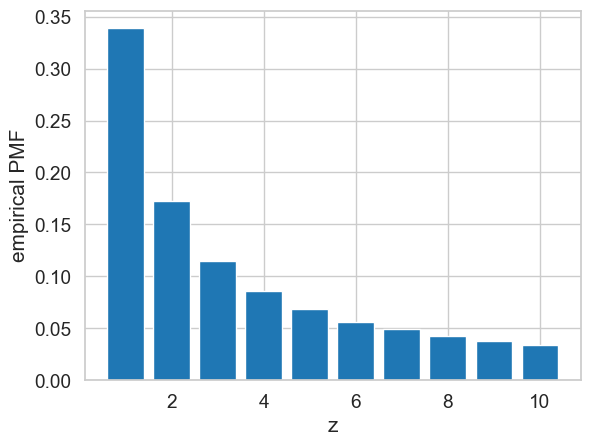

In [ ]:
plt.bar(bin_ctrs_B, pmf_B)
plt.xlabel("z")
plt.ylabel("empirical PMF");

In [ ]:
# Verify that the recovered PMF matches our desired definition

c = pmf_B[0]

for k in range(1, 10+1):
    print("k = %2d | actual Pr(Z = %2d) = %.4f | ideal = c / k = %.4f" % (
        k, k, pmf_B[k-1], c / k))

k =  1 | actual Pr(Z =  1) = 0.3389 | ideal = c / k = 0.3389
k =  2 | actual Pr(Z =  2) = 0.1722 | ideal = c / k = 0.1694
k =  3 | actual Pr(Z =  3) = 0.1144 | ideal = c / k = 0.1130
k =  4 | actual Pr(Z =  4) = 0.0857 | ideal = c / k = 0.0847
k =  5 | actual Pr(Z =  5) = 0.0685 | ideal = c / k = 0.0678
k =  6 | actual Pr(Z =  6) = 0.0565 | ideal = c / k = 0.0565
k =  7 | actual Pr(Z =  7) = 0.0491 | ideal = c / k = 0.0484
k =  8 | actual Pr(Z =  8) = 0.0426 | ideal = c / k = 0.0424
k =  9 | actual Pr(Z =  9) = 0.0382 | ideal = c / k = 0.0377
k = 10 | actual Pr(Z = 10) = 0.0339 | ideal = c / k = 0.0339
